Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
4. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
img_1 = cv.imread('./TP3/images/coca_logo_1.png')
img_2 = cv.imread('./TP3/images/COCA-COLA-LOGO.jpg')
img_3 = cv.imread('./TP3/images/coca_logo_2.png')
img_4 = cv.imread('./TP3/images/coca_multi.png')
img_5 = cv.imread('./TP3/images/coca_retro_1.png')
img_6 = cv.imread('./TP3/images/coca_retro_2.png')
img_7 = cv.imread('./TP3/images/logo_1.png')
template = cv.imread('./TP3/template/pattern.png', 0)

img_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
img_2_gray = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
img_3_gray = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY)
img_4_gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_5_gray = cv.cvtColor(img_5, cv.COLOR_BGR2GRAY)
img_6_gray = cv.cvtColor(img_6, cv.COLOR_BGR2GRAY)
img_7_gray = cv.cvtColor(img_7, cv.COLOR_BGR2GRAY)
#template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

In [31]:
img_1.size, img_1.shape

(310500, (500, 207, 3))

In [49]:
template.shape

(175, 400)

In [39]:
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [38]:
img_2.shape

(1389, 1389, 3)

In [58]:
res = cv.matchTemplate(img_1_gray, template, method)
template.shape

(90, 207)

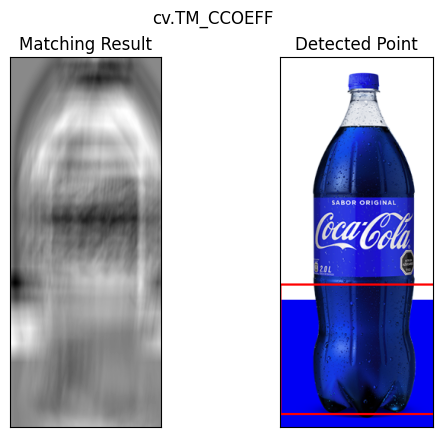

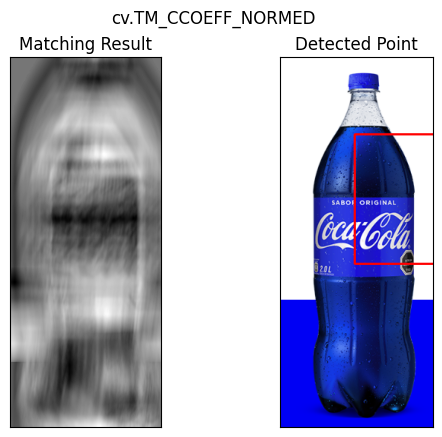

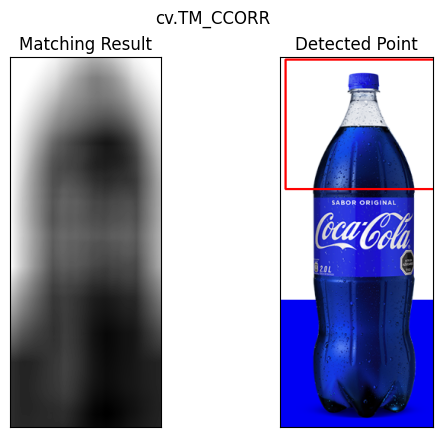

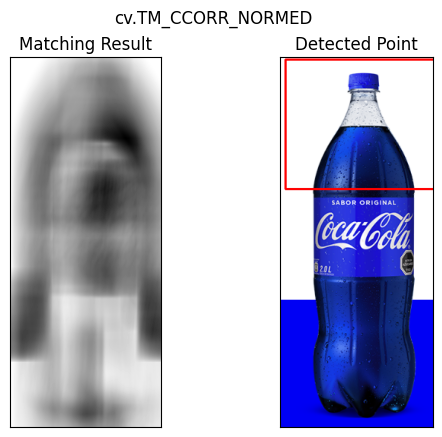

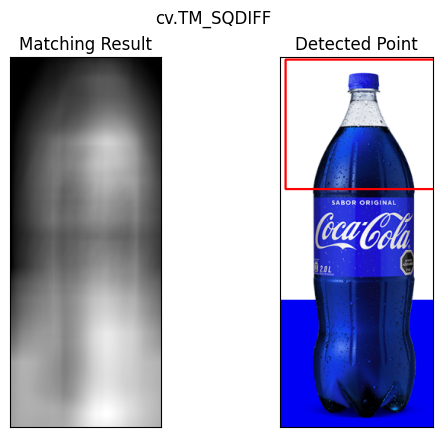

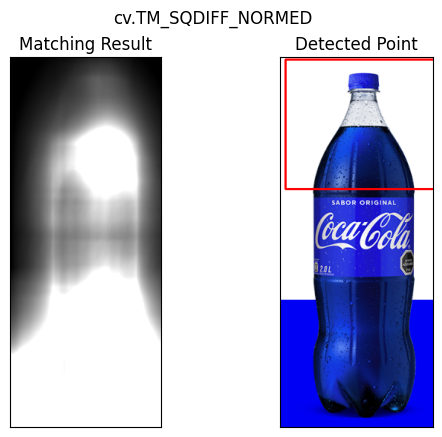

In [59]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_1.copy()
    height_salida, width_salida = img_salida.shape[:2]
    height_template, width_template = template.shape[:2]

    # Check if the width of img_salida is smaller than the width of the template

    scale_factor_w = width_salida / width_template
    scale_factor_h = height_salida / height_template
    scale_factor = min(scale_factor_w, scale_factor_h) / 2
    if scale_factor < 1:
        new_width = int(width_template * scale_factor)
        new_height = int(height_template * scale_factor)
        template = cv.resize(template, (new_height, new_width))
    
    method = eval(meth)
    
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_1_gray, template, method)
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
    
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos


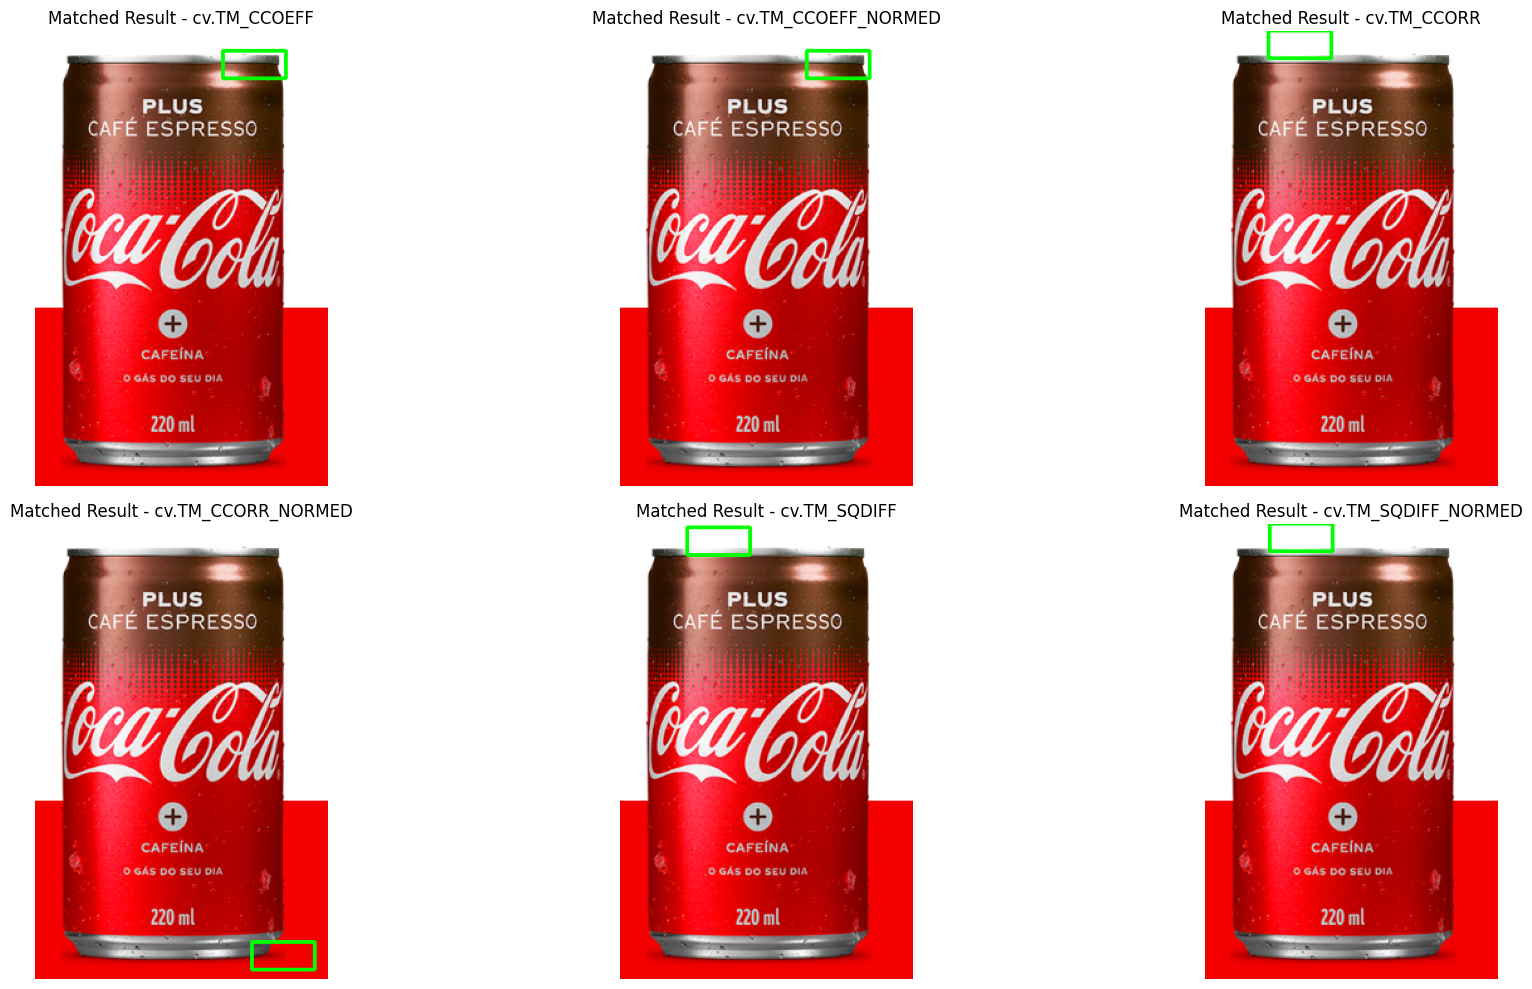

In [9]:
# Build Gaussian pyramid for the template image
template_pyramid = [template_gray]
while len(template_pyramid) < 4:  # Adjust the number of levels in the pyramid as needed
    template_pyramid.append(cv.pyrDown(template_pyramid[-1]))

# Use the lowest resolution image in the pyramid as the resized template
resized_template = template_pyramid[-1]

# Define the methods
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Create a figure to display the images
plt.figure(figsize=(20, 10))

# Loop through each method
for i, meth in enumerate(methods, 1):
    method = eval(meth)
    
    # Apply template matching
    result = cv.matchTemplate(img_3_gray, resized_template, method)
    
    # Get the min and max values and their locations
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
    
    # For TM_SQDIFF and TM_SQDIFF_NORMED, use min_loc
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Get the bottom right of the matched area
    h, w = resized_template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Draw a rectangle around the matched area
    matched_image = img_3.copy()
    cv.rectangle(matched_image, top_left, bottom_right, (0,255,0), 2)
    
    # Plot the matched result
    plt.subplot(2, 3, i)
    plt.imshow(cv.cvtColor(matched_image, cv.COLOR_BGR2RGB))
    plt.title('Matched Result - {}'.format(meth))
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


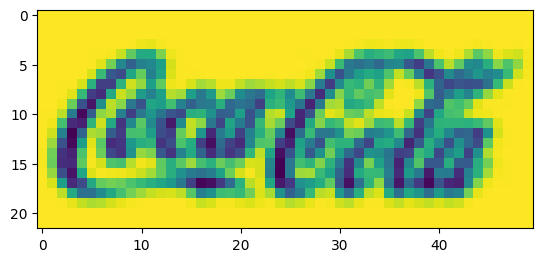

In [6]:
plt.imshow(resized_template)